# Exercise 4: Various kernels
Much of the flexibility in SVM lies in the kernel. In this exercise you will solve the same problem using three different kernels: linear, RBF, and polynomial. These should later be compared in terms of predictive performance.
Use the dataset dist.csv, which is a small constructed toy set, it is visualized in Figure 4. The data is Gaussian mixture data, so there is a well-defined true decision bound

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Solution to problem with loading first entry in dist.csv
# https://stackoverflow.com/questions/56065875/numpy-genfromtxt-reading-first-value-of-csv-as-missing
with open('data/dist.csv', 'r', encoding='utf-8-sig') as f: 
    data = np.genfromtxt(f, dtype=float, delimiter=';')

X = data[:, :-1]
y = data[:, -1]
# Load validation set
with open('data/dist_val.csv', 'r', encoding='utf-8-sig') as f: 
    data = np.genfromtxt(f, dtype=float, delimiter=';')
X_val = data[:, :-1]
y_val = data[:, -1]

1. Tune the necessary hyperparameters by for instance grid search. In this exercise we are concerned with the hyperparameters given in Table 2. Every hyperparameter should be tested for at least 3 values but you are free to add more testings. There is a desginated validation set that can be used for the validation of the hyperparameters dist_val.csv.

In [10]:
# Generate training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_val, y_val, train_size=0.2)

# Function that iterates over potential best values for C in two iterations
# Thought it could be fun to do it like this instead of sklearn grid search, at least for the linear model.
# The result is nearly identical to the sklearn grid search when I have compared.
def linear_svm_hyperparameter_search(X_train, y_train, y):
  first_iteration_C = [10 ** i for i in range(-3, 3)]
  best_accuracy = 0
  best_C = 0

  # basically, we iterate over each C and create a new model
  # Compare accuracy and save the best accuracy we found
  print("\n" + "Starting first iteration..." + "\n")
  for C in first_iteration_C:
    svm_linear = SVC(kernel='linear', C=C)
    svm_linear.fit(X_train, y_train)
    y_pred = svm_linear.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Debug (keeping these debug statements as terminal feedback to the user)
    print(f"Accuracy score for C = {round(C, 3)} is {round((accuracy * 100), 2)}%")
    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_C = C
      # Debug
      print(f"New best C found: C = {best_C}")
  
  # Second round we (hopefully) get a even better value for our C.
  second_iteration_C = [best_C + (best_C * i) for i in range(1,11)]

  print("\n" + "Starting second iteration..." + "\n")
  for C in second_iteration_C:
    svm_linear = SVC(kernel='linear', C=C)
    svm_linear.fit(X_train, y_train)
    y_pred = svm_linear.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Debug
    print(f"Accuracy score for C = {round(C, 3)} is {round((accuracy * 100), 2)}%")
    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_C = C
      # Debug
      print(f"New best C found: C = {best_C}")

  print(f"Search Done. Best found value for C is {best_C}.")
  return best_C

# This is the linear model we found.
best_C = linear_svm_hyperparameter_search(X_train, y_train, y)
svm_linear = SVC(kernel='linear', C=best_C)
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X)
print(f"Accuracy Score: {accuracy_score(y, y_pred)}")

# The other models is more complex with more hyperparameters. Better to use gridsearch for them.
# We also get a better result with the use of cross validation etc which is lacking in the previous function.

# I come from the future where I have done task 6 and noticed that my values for rbf gamma is way off.
# This is the solution I applied in the task 6 when searching for gamma values.
# Found default gamma value from this discussion:
# https://stackoverflow.com/questions/59660939/default-value-of-gamma-svc-sklearn
default_gamma = 1 / ((X_train.shape[1] * X_train.var()))
ten_percent_gamma = 0.1 * default_gamma
gamma_values = [default_gamma + (ten_percent_gamma * i) for i in range(1, 5)]
gamma_values += [default_gamma - (ten_percent_gamma * i) for i in range(1, 5)]
gamma_values.append(default_gamma)
gamma_values.append(1)

# Define a grid of hyperparameters
param_grid = {'C': [0.04],
             'gamma': gamma_values,
             'degree': [3]}

# Create a SVM classifier with linear kernel
svm = SVC(kernel='poly')

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']
best_degree = grid_search.best_params_['degree']

print(f'best C: {best_C}')
print(f"best gamma: {best_gamma}")
print(f"best degree: {best_degree}")



Starting first iteration...

Accuracy score for C = 0.001 is 88.88%
New best C found: C = 0.001
Accuracy score for C = 0.01 is 89.07%
New best C found: C = 0.01
Accuracy score for C = 0.1 is 89.12%
New best C found: C = 0.1
Accuracy score for C = 1 is 89.11%
Accuracy score for C = 10 is 89.1%
Accuracy score for C = 100 is 89.12%

Starting second iteration...

Accuracy score for C = 0.2 is 89.11%
Accuracy score for C = 0.3 is 89.11%
Accuracy score for C = 0.4 is 89.1%
Accuracy score for C = 0.5 is 89.09%
Accuracy score for C = 0.6 is 89.09%
Accuracy score for C = 0.7 is 89.09%
Accuracy score for C = 0.8 is 89.1%
Accuracy score for C = 0.9 is 89.11%
Accuracy score for C = 1.0 is 89.11%
Accuracy score for C = 1.1 is 89.11%
Search Done. Best found value for C is 0.1.
Accuracy Score: 0.892
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .........C=0.04, degree=3, gamma=0.0757732345252553; total time=   0.1s
[CV] END .........C=0.04, degree=3, gamma=0.0757732345252553;

|#| Kernel | Grid Values       | Best C | Best Gamma | degree |
|-|--------|-------------------|--------|------------|---|
|1 | RBF |  'C': [10 ** i for i in range(-3, 3)],'gamma': [10 ** i for i in range(-3, 3)]|   0.1     |      1      | -  |
|2| RBF    |'C': [0.1 * i for i in range(1, 11)], 'gamma': [1 * i for i in range(1, 11)]| 0.4   |     1       |  - |
|3| RBF    |'C': [0.4], 'gamma': **see comment**| 0.4   |     0.08077289915253283       |  - |
|1 | Poly |  'C': [10 ** i for i in range(-3, 1)],'gamma': 'gamma': [1 * i for i in range(1, 4)], 'degree': [1 * i for i in range(1, 4)]|   0.001     |      1      | 3  |
|2 | Poly |  'C': [10 ** i for i in range(-3, 0)],'gamma': 'gamma': [1], 'degree': [1 * i for i in range(3, 6)]|   0.01     |      1      | 3  |
|3 | Poly |  'C': [0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05],'gamma': [1], 'degree': [3]|   0.003     |      1      | 3  |

*Best C for linear: a value between 0.001 and 1. I have not seen any conclusive data that points to any C between these values to significantly better than the others.*

*Gamma values RBF #3: gamma_values = [default_gamma + (ten_percent_gamma * i) for i in range(1, 5)]
gamma_values += [default_gamma - (ten_percent_gamma * i) for i in range(1, 5)]
gamma_values.append(default_gamma)*


##### 2. For each kernel, produce a plot of the decision boundary for the best models together with the data. If you want you can also include the true decision boundary as a comparison.

The decision boundary code has parameters that aims to provide quick plots with lower resolution. This plot is made with higher resolution but took 7 minutes to create:

![Various_Kernels](img/Various_Kernels_Decision.png)

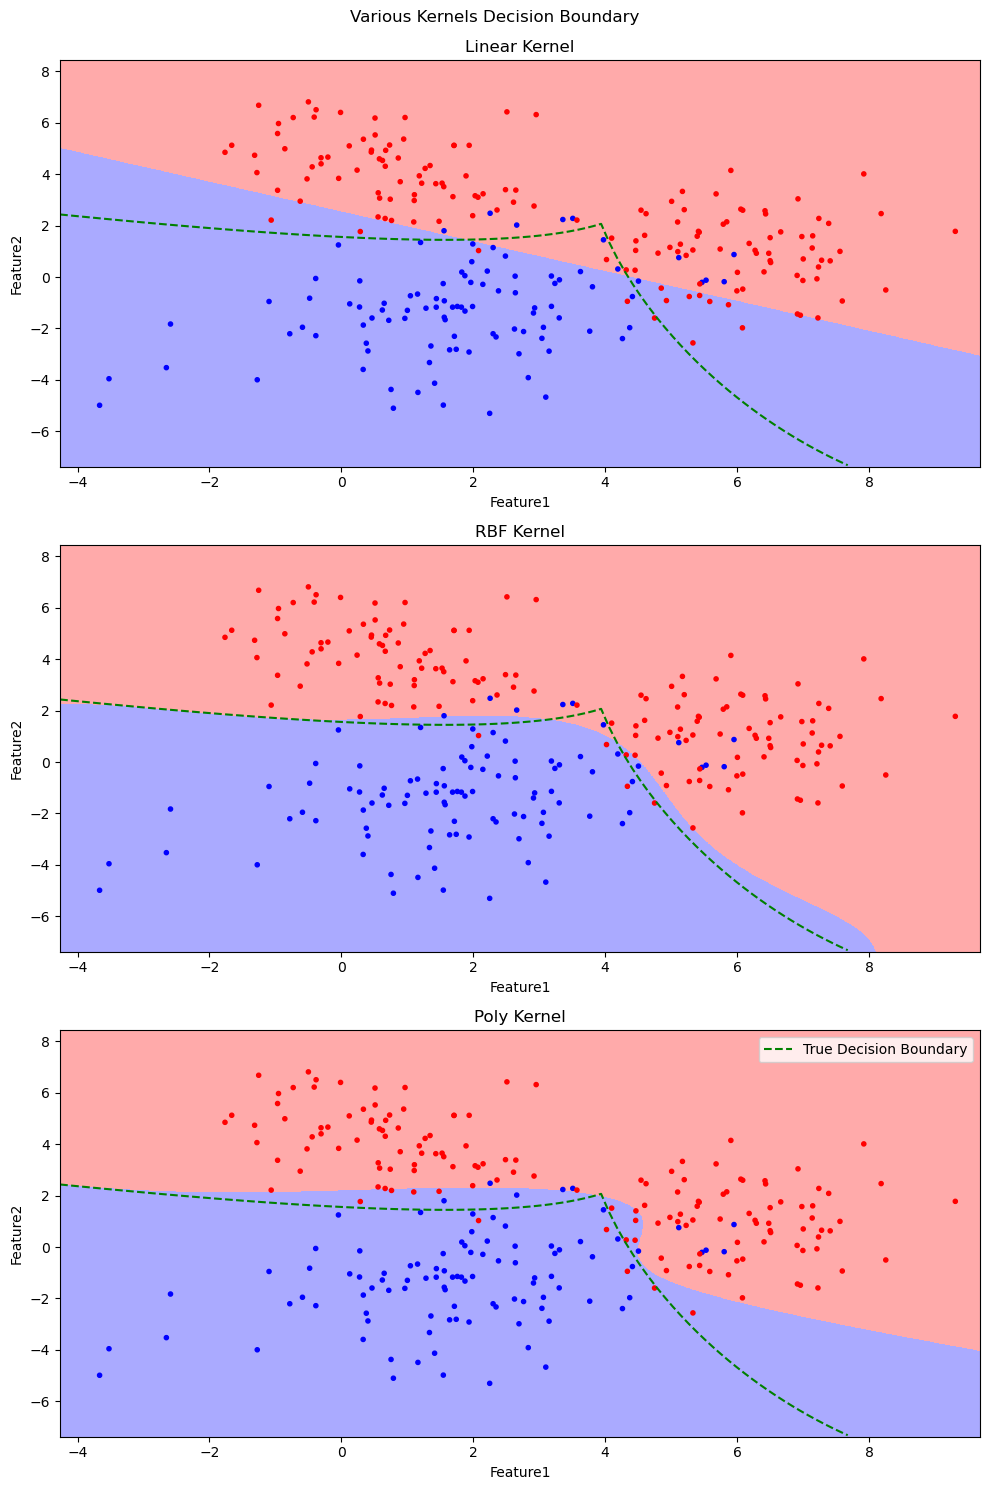

In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# This is the equation from the exercise description
def generate_true_decision_values(x):
  if x > 3.94:
    return 0.5 * (18-(2*x)-np.sqrt(-724 + (256*x) - (16*(x**2))))
  else:
    return 0.071 * (174 - (22 * x) - np.sqrt(23123 - (6144 * x) + (288 * (x**2))))

# Create the best models with hyperparameters from last task
best_linear = SVC(kernel='linear', C=0.01)
best_linear.fit(X_train, y_train)
best_rbf = SVC(kernel='rbf', C=0.4, gamma=0.08077289915253283)
best_rbf.fit(X_train, y_train)
best_poly = SVC(kernel='poly', C=0.003, degree=3, gamma=1)
best_poly.fit(X_train, y_train)

# Generate grid points
x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# True decision boundary
x_values_true_decision = np.linspace(x_min, x_max - 2, 100)
y_values_true_decision = [generate_true_decision_values(x) for x in x_values_true_decision]

# List colors
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']) # mesh plot 
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])  # colors

# Predict labels for grid points
Z_linear = best_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)
Z_rbf = best_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)
Z_poly = best_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z_poly = Z_poly.reshape(xx.shape)

plt.figure(figsize=(10,15))

# Create subplot 1
plt.subplot(3,1,1)
plt.pcolormesh(xx, yy, Z_linear, cmap=cmap_light)
# Plot the data points on top
plt.scatter(X[:, 0], X[:, 1], c=y, marker='.', cmap=cmap_bold)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
# Plot true decision boundary
plt.plot(x_values_true_decision, y_values_true_decision, c='green', linestyle='--', label='True Decision Boundary')
plt.title('Linear Kernel')

# Create subplot 2
plt.subplot(3,1,2)
plt.pcolormesh(xx, yy, Z_rbf, cmap=cmap_light)
# Plot the data points on top
plt.scatter(X[:, 0], X[:, 1], c=y, marker='.', cmap=cmap_bold)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
# True decision boundary
plt.plot(x_values_true_decision, y_values_true_decision, c='green', linestyle='--', label='True Decision Boundary')
plt.title('RBF Kernel')

# Create subplot 3
plt.subplot(3,1,3)
plt.pcolormesh(xx, yy, Z_poly, cmap=cmap_light)
# Plot the data points on top
plt.scatter(X[:, 0], X[:, 1], c=y, marker='.', cmap=cmap_bold)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
# True decision boundary
plt.plot(x_values_true_decision, y_values_true_decision, c='green', linestyle='--', label='True Decision Boundary')
plt.title('Poly Kernel')

plt.suptitle('Various Kernels Decision Boundary', y=0.99)
plt.legend()
plt.tight_layout()
plt.show()